><h1> Exploratory Data Analysis of KDDCup'99 Dataset <h1>
><h3> Author: Shubham Manekar <br>
> Last Updated: December 24, 2021 <h3>

<h4> This notebook intends to conducts the EDA of KDDCup'99 Dataset. The analysis includes: <br>
1. Assigning missing features <br>
2. Initial impressions  of the raw data <br>
3. Attack based analysis and Categorizing the attacks <br>
4. Generating the ProfileReport of the updated dataset and Correlation Analysis <br>
5. Encoding and scaling the features <br>
6. PCA and Clustering Analysis

<h4>
<hr>

> <h2> Importing Libraries 
<h4> For Preprocessing: LabelEncoder, MinMaxScaler <br>
For Dimenstionality Reduction Analysis: PCA <br>
For Clustering Analysis: KMeans <br>
For Modelling: train_test_split <br>
For Visualizations: matplotlib.pyplot, seaborn, graph_objs <br>
For Generating Profiling Reports: ProfileReport <br> <h4>

In [146]:
import pandas as pd
import numpy as np
from pandas_profiling import ProfileReport
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
import seaborn as sns
import plotly.graph_objs as go
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

<hr>

> <h2> Importing Raw Data and Assigning Features <h2>

In [2]:
column_names = [
    'duration',
    'protocol_type',
    'service',
    'flag',
    'src_bytes',
    'dst_bytes',
    'land',
    'wrong_fragment',
    'urgent',
    'hot',
    'num_failed_logins',
    'logged_in',
    'num_compromised',
    'root_shell',
    'su_attempted',
    'num_root',
    'num_file_creations',
    'num_shells',
    'num_access_files',
    'num_outbound_cmds',
    'is_host_login',
    'is_guest_login',
    'count',
    'srv_count',
    'serror_rate',
    'srv_serror_rate',
    'rerror_rate',
    'srv_rerror_rate',
    'same_srv_rate',
    'diff_srv_rate',
    'srv_diff_host_rate',
    'dst_host_count',
    'dst_host_srv_count',
    'dst_host_same_srv_rate',
    'dst_host_diff_srv_rate',
    'dst_host_same_src_port_rate',
    'dst_host_srv_diff_host_rate',
    'dst_host_serror_rate',
    'dst_host_srv_serror_rate',
    'dst_host_rerror_rate',
    'dst_host_srv_rerror_rate',
    'deu_ruim_ou_nao'
    ]

In [3]:
raw_df = pd.read_csv('../Data/corrected.csv', header=None, names=column_names)
raw_df['deu_ruim_ou_nao']=raw_df['deu_ruim_ou_nao'].str.replace('.','')

raw_df.head()

C:\Users\SHUBHAM\AppData\Local\Temp/ipykernel_17080/3147293767.py:2: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.



,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,deu_ruim_ou_nao
0,0,udp,private,SF,105,146,0,0,0,0,...,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0,normal
1,0,udp,private,SF,105,146,0,0,0,0,...,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0,normal
2,0,udp,private,SF,105,146,0,0,0,0,...,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0,normal
3,0,udp,private,SF,105,146,0,0,0,0,...,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0,snmpgetattack
4,0,udp,private,SF,105,146,0,0,0,0,...,254,1.0,0.01,0.01,0.0,0.0,0.0,0.0,0.0,snmpgetattack


raw_df.to_csv('../Data/raw_df.csv',index=False)

<hr>

> <h2> Raw Data Initial Impressions <h2>
<h4> Analysis for missing values, Data Types, Categorical Unique Values, Numerical Data Distribution <h4>

In [4]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311029 entries, 0 to 311028
Data columns (total 42 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     311029 non-null  int64  
 1   protocol_type                311029 non-null  object 
 2   service                      311029 non-null  object 
 3   flag                         311029 non-null  object 
 4   src_bytes                    311029 non-null  int64  
 5   dst_bytes                    311029 non-null  int64  
 6   land                         311029 non-null  int64  
 7   wrong_fragment               311029 non-null  int64  
 8   urgent                       311029 non-null  int64  
 9   hot                          311029 non-null  int64  
 10  num_failed_logins            311029 non-null  int64  
 11  logged_in                    311029 non-null  int64  
 12  num_compromised              311029 non-null  int64  
 13 

In [5]:
raw_df.describe(include=object)

,protocol_type,service,flag,deu_ruim_ou_nao
count,311029,311029,311029,311029
unique,3,65,11,38
top,icmp,ecr_i,SF,smurf
freq,164969,164352,248379,164091


In [6]:
pd.options.display.max_columns = None
raw_df.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,311029.000000,3.110290e+05,3.110290e+05,311029.000000,311029.000000,311029.000000,311029.000000,311029.000000,311029.000000,311029.000000,311029.000000,311029.000000,311029.000000,311029.000000,311029.000000,311029.000000,311029.0,311029.000000,311029.000000,311029.000000,311029.000000,311029.000000,311029.000000,311029.000000,311029.000000,311029.000000,311029.000000,311029.000000,311029.000000,311029.000000,311029.000000,311029.000000,311029.000000,311029.000000,311029.000000,311029.000000,311029.000000,311029.000000
mean,17.902736,1.731702e+03,7.479937e+02,0.000029,0.000762,0.000051,0.014677,0.002363,0.172476,0.011243,0.000199,0.000023,0.008359,0.000958,0.000084,0.000772,0.0,0.000039,0.002424,269.247019,235.580039,0.059215,0.059193,0.142585,0.142248,0.815654,0.024447,0.025349,235.282681,199.193914,0.793494,0.024953,0.547919,0.004566,0.058764,0.058791,0.142659,0.141693
std,407.644400,1.276567e+05,1.612018e+04,0.005379,0.040367,0.009821,0.312068,0.049990,0.377794,1.958325,0.014117,0.005947,2.165196,0.193119,0.012930,0.029453,0.0,0.006211,0.049177,219.834412,239.308028,0.233873,0.234818,0.347564,0.348233,0.371605,0.107061,0.125231,60.913298,100.306470,0.387090,0.096003,0.491963,0.035773,0.231296,0.232997,0.344380,0.346573
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.050000e+02,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,17.000000,7.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,255.000000,244.000000,0.970000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,5.200000e+02,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,212.000000,126.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,255.000000,255.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.032000e+03,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,511.000000,511.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,255.000000,255.000000,1.000000,0.010000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,57715.000000,6.282565e+07,5.203179e+06,1.000000,3.000000,3.000000,101.000000,4.000000,1.000000,796.000000,1.000000,2.000000,878.000000,100.000000,5.000000,4.000000,0.0,1.000000,1.000000,511.000000,511.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<hr>

> <h2> Attacks Based Analysis and Categorizing the Attacks <h2>
<h4> Frequency distribution of Attacks and Attack Types <h4>

In [7]:
attacks = raw_df['deu_ruim_ou_nao'].value_counts()
x = attacks.index
y = list(attacks)

data = [go.Bar(x=x,
                y=y,
                marker=dict(
                        color='rgb(51,204,153)'
                        ))]
layout = go.Layout(title='Attack Counts',
                    xaxis = {'title':'Attacks'},
                    yaxis=dict(title='Counts'),
                    hovermode='closest')

fig = go.Figure(data=data,layout=layout)
#pyo.plot(fig, filename='Figures/attacks_count.html')
fig.show()

In [8]:
DoS = list([
    'smurf', 'pod', 'neptune', 'teardrop', 'land', 'apache2', 
    'back', 'udpstorm', 'mailbomb', 'processtable'
])

U2R = list([

    'buffer_overflow', 'loadmodule', 'perl', 'rootkit', 'xterm', 'ps', 
    'httptunnel', 'sqlattack', 'worm', 'snmpguess'
])

R2L = list([
    'guess_passwd', 'ftp_write', 'imap', 'phf', 'multihop', 'warezmaster',
    'snmpgetattack',  'named', 'xlock', 'xsnoop', 'sendmail'
])

Probe = list([
    'portsweep', 'ipsweep', 'nmap', 'saint', 'satan', 'mscan'
])

In [9]:
for attack in Probe:
    raw_df['deu_ruim_ou_nao']=raw_df['deu_ruim_ou_nao'].str.replace(attack,'Probe')
    
for attack in DoS:
    raw_df['deu_ruim_ou_nao']=raw_df['deu_ruim_ou_nao'].str.replace(attack,'DoS')

for attack in U2R:
    raw_df['deu_ruim_ou_nao']=raw_df['deu_ruim_ou_nao'].str.replace(attack,'U2R')

for attack in R2L:
    raw_df['deu_ruim_ou_nao']=raw_df['deu_ruim_ou_nao'].str.replace(attack,'R2L')

raw_df.to_csv('../Data/attack_cat_raw_df.csv',index=False)

In [10]:
attack_types = raw_df['deu_ruim_ou_nao'].value_counts()
x = attack_types.index
y = list(attack_types)

data = [go.Bar(x=x,
                y=y,
                marker=dict(
                        color='firebrick'
                        ))]
layout = go.Layout(title='Attack Types Counts',
                    xaxis = {'title':'Types of Attacks'},
                    yaxis=dict(title='Counts'),
                    hovermode='closest')

fig = go.Figure(data=data,layout=layout)
#pyo.plot(fig, filename='Figures/attack_types_count.html')
fig.show()

In [11]:
raw_df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,deu_ruim_ou_nao
0,0,udp,private,SF,105,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,255,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0,normal
1,0,udp,private,SF,105,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,255,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0,normal
2,0,udp,private,SF,105,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,255,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0,normal
3,0,udp,private,SF,105,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,255,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0,R2L
4,0,udp,private,SF,105,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,255,254,1.0,0.01,0.01,0.0,0.0,0.0,0.0,0.0,R2L


raw_df=pd.read_csv('../Data/attack_cat_raw_df.csv')

<hr>

> <h2> Updated DataSet profile report and Heatmap Correlation <h2>

In [147]:
profile = ProfileReport(raw_df, title="KDDCup'99 DataSet Pandas Profiling Report", explorative=True)
profile.to_file("../Figures/KDDCup_DataSet_report.html")

Summarize dataset:  85%|████████▍ | 45/53 [00:22<00:02,  2.91it/s, Calculate kendall correlation]                C:\Users\SHUBHAM\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\stats\stats.py:4812: RuntimeWarning:

overflow encountered in longlong_scalars

C:\Users\SHUBHAM\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\stats\stats.py:4814: RuntimeWarning:

invalid value encountered in sqrt

Export report to file: 100%|██████████| 1/1 [00:00<00:00,  3.34it/s]


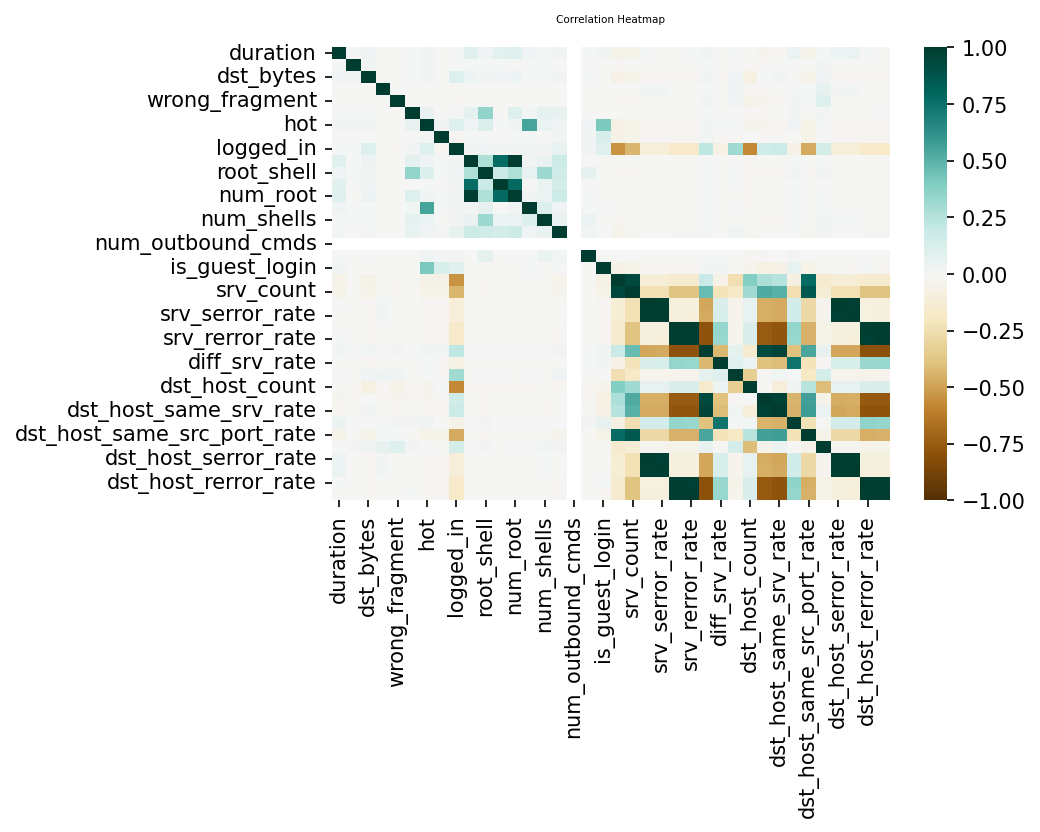

In [152]:
plt.rcParams['figure.dpi'] = 150
heatmap = sns.heatmap(raw_df.corr(), vmin=-1, vmax=1, annot=False, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':5}, pad=12)

plt.savefig("../Figures/Heatmap_Correlation.png")

<hr>

> <h2> Encoding the categorical features and Scaling the Numerical features

In [13]:
categorical_features = list(raw_df.select_dtypes(include=['object']).columns)
numerical_features = list(raw_df.select_dtypes(exclude=['object']).columns)

lab_enc_df = raw_df.copy()

labelencoder = LabelEncoder()

for c in categorical_features:
    lab_enc_df[c] = labelencoder.fit_transform(lab_enc_df[c])

In [14]:
lab_enc_df

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,deu_ruim_ou_nao
0,0,2,46,9,105,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,255,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0,4
1,0,2,46,9,105,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,255,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0,4
2,0,2,46,9,105,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,255,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0,4
3,0,2,46,9,105,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,255,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0,2
4,0,2,46,9,105,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,255,254,1.0,0.01,0.01,0.0,0.0,0.0,0.0,0.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
311024,0,2,46,9,105,147,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,255,255,1.0,0.00,0.01,0.0,0.0,0.0,0.0,0.0,4
311025,0,2,46,9,105,147,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,255,255,1.0,0.00,0.01,0.0,0.0,0.0,0.0,0.0,4
311026,0,2,46,9,105,147,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,255,255,1.0,0.00,0.01,0.0,0.0,0.0,0.0,0.0,4
311027,0,2,46,9,105,147,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,255,255,1.0,0.00,0.01,0.0,0.0,0.0,0.0,0.0,4


<h4> After Label encoding the five attack types (Along with protocol_type, service, flag) are transformed as follows:<br>
0 - DoS  <br>   4 - Normal   <br>   2 - R2L  <br>   1 - Probe    <br>   3 - U2R <h4>

In [15]:
scaled_df = lab_enc_df.copy()

col_names = numerical_features
features = scaled_df[col_names]

scaler = MinMaxScaler().fit(features.values)
features = scaler.transform(features.values)

scaled_df[col_names] = features

In [16]:
scaled_df

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,deu_ruim_ou_nao
0,0.0,2,46,9,0.000002,0.000028,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.001957,0.001957,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.996078,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0,4
1,0.0,2,46,9,0.000002,0.000028,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.001957,0.001957,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.996078,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0,4
2,0.0,2,46,9,0.000002,0.000028,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.001957,0.001957,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.996078,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0,4
3,0.0,2,46,9,0.000002,0.000028,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.003914,0.003914,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.996078,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0,2
4,0.0,2,46,9,0.000002,0.000028,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.003914,0.003914,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.996078,1.0,0.01,0.01,0.0,0.0,0.0,0.0,0.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
311024,0.0,2,46,9,0.000002,0.000028,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.003914,0.003914,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.000000,1.0,0.00,0.01,0.0,0.0,0.0,0.0,0.0,4
311025,0.0,2,46,9,0.000002,0.000028,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.007828,0.007828,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.000000,1.0,0.00,0.01,0.0,0.0,0.0,0.0,0.0,4
311026,0.0,2,46,9,0.000002,0.000028,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.003914,0.003914,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.000000,1.0,0.00,0.01,0.0,0.0,0.0,0.0,0.0,4
311027,0.0,2,46,9,0.000002,0.000028,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.007828,0.007828,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.000000,1.0,0.00,0.01,0.0,0.0,0.0,0.0,0.0,4


<h4> Scaling of Numerical features is done using MinMax Scaling and the range is [0,1] <h4>

scaled_df.to_csv('../Data/scaled_enc_df.csv',index=False)

<hr>

> <h2> PCA and Clustering Analysis <h2>

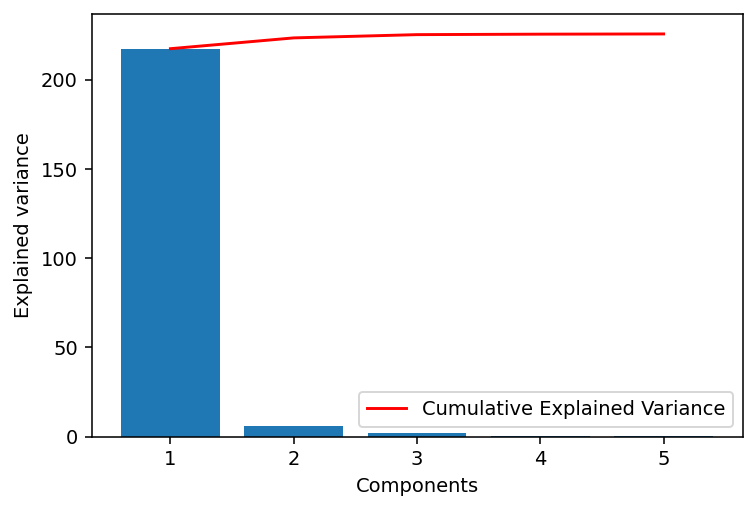

In [155]:
plt.rcParams['figure.dpi'] = 140

pcamodel = PCA(n_components=5)
pca = pcamodel.fit_transform(scaled_df)

plt.bar(range(1,len(pcamodel.explained_variance_ )+1),pcamodel.explained_variance_ )
plt.ylabel('Explained variance')
plt.xlabel('Components')
plt.plot(range(1,len(pcamodel.explained_variance_ )+1),
         np.cumsum(pcamodel.explained_variance_),
         c='red',
         label="Cumulative Explained Variance")
plt.legend(loc='best')
plt.savefig("../Figures/Explained_Variance.png")

<h4> The above graph shows that the cumulative explained variance does not increase significantly after second component <h4>

C:\Users\SHUBHAM\AppData\Local\Temp/ipykernel_17080/4201097478.py:13: UserWarning:

Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.



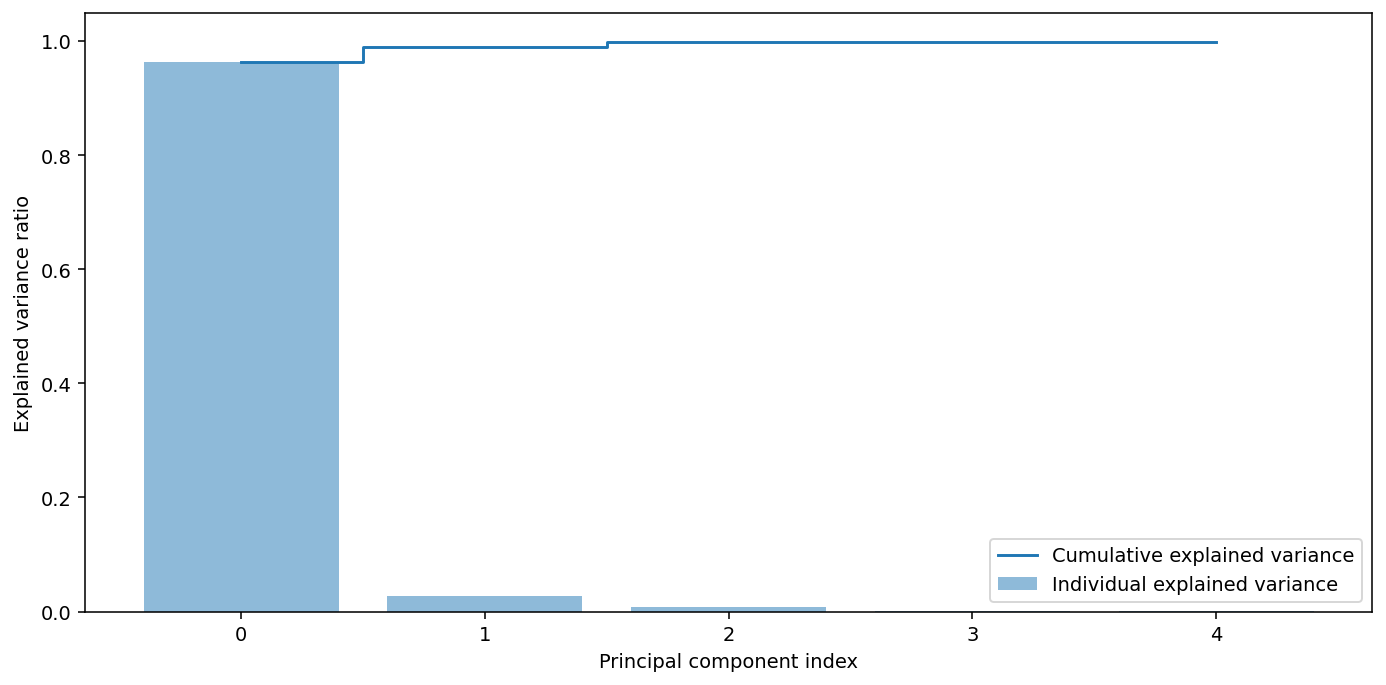

In [156]:
plt.figure(figsize=(10,5))

exp_var_pca = pcamodel.explained_variance_ratio_

cum_sum_eigenvalues = np.cumsum(exp_var_pca)

plt.bar(range(0,len(exp_var_pca)), exp_var_pca, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()
plt.savefig("../Figures/Explained_Variance_Ratio.png")

<h4> The above graph shows that the explained variance ratio for first component is very high indicating that the almost same amount of information can be conveyed using first component alone. <h4>

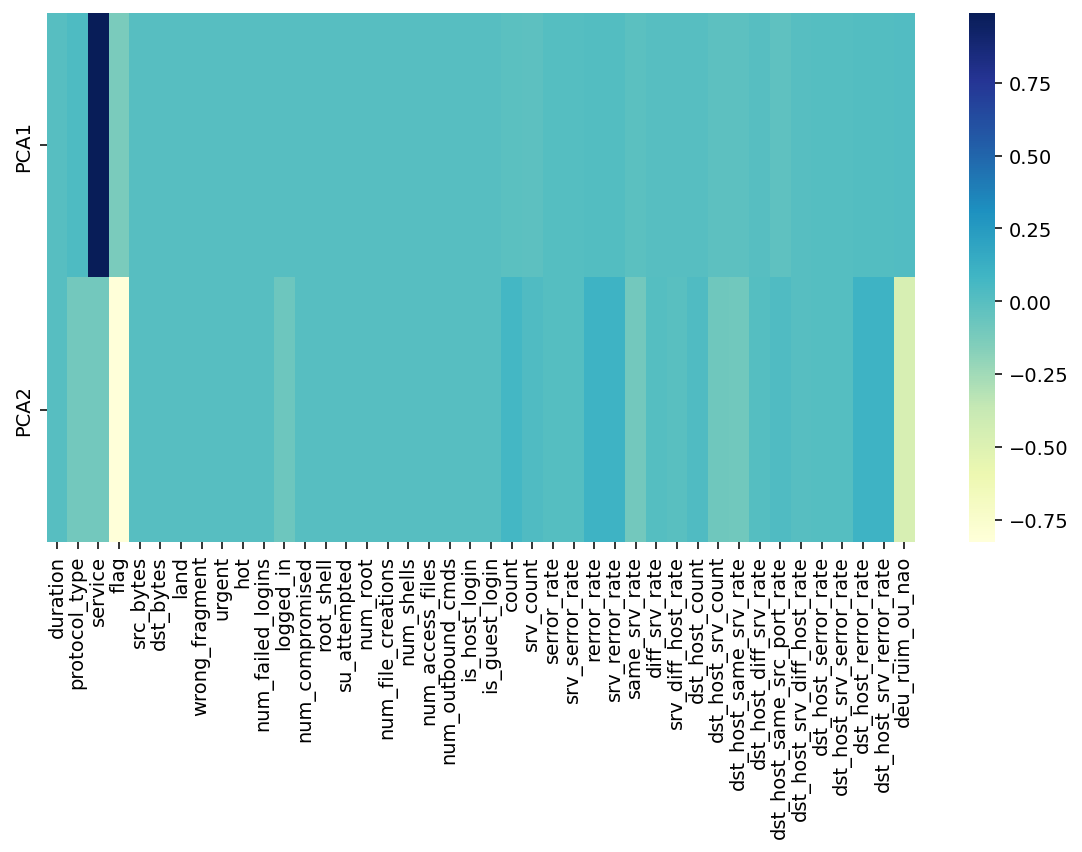

In [131]:
plt.figure(figsize=(10,5))

pcamodel = PCA(n_components=2)
pca = pcamodel.fit_transform(scaled_df)

ax = sns.heatmap(pcamodel.components_,
                 cmap='YlGnBu',
                 yticklabels=[ "PCA"+str(x) for x in range(1,pcamodel.n_components_+1)],
                 xticklabels=list(scaled_df.columns),
                 cbar_kws={"orientation": "vertical"})
ax.set_aspect("auto")
plt.savefig("../Figures/Features_along_PCA_Components.png")

<h4> The above heatmap shows the component wise features importance. <h4>

C:\Users\SHUBHAM\AppData\Local\Temp/ipykernel_17080/3004688095.py:18: UserWarning:

Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.



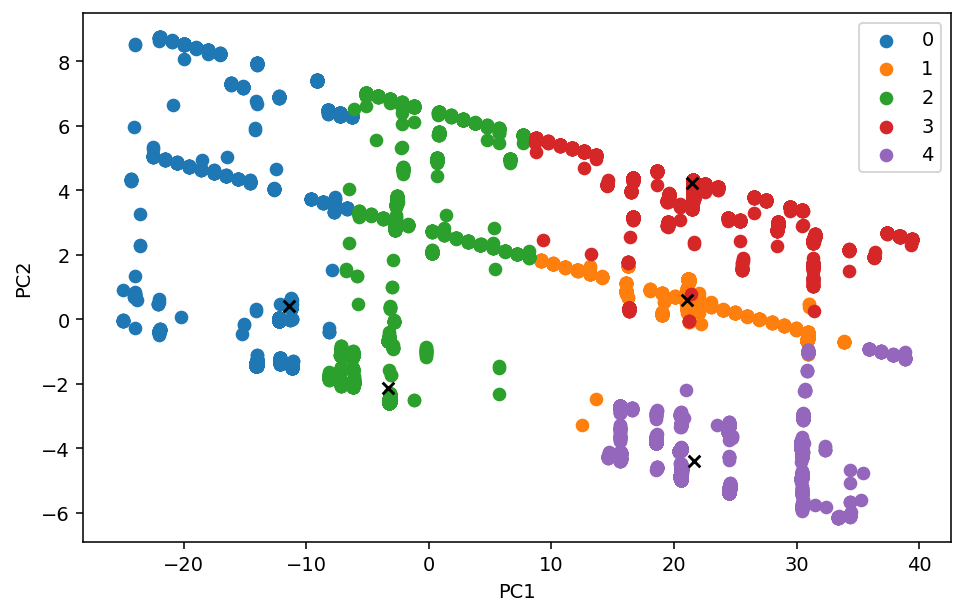

In [157]:
pca_data = pd.DataFrame(pca)

model = KMeans(n_clusters = 5, init = "k-means++")
label2 = model.fit_predict(pca_data)

centers = np.array(model.cluster_centers_)

plt.figure(figsize=(8,5))
uniq = np.unique(label2)

for i in uniq:
  plt.scatter(pca_data[label2 == i][0] , pca_data[label2 == i][1] , label = i)

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.scatter(centers[:,0], centers[:,1], marker="x", color='k')
plt.legend()
plt.show()
plt.savefig("../Figures/Clusters_along_PCA_Components.png")

<h4> The above graph shows the cluster formation of different attacks and their centers (Marked by X). <br> It can be said that there exist a decision boundary between different types of the attacks. <h4>

<hr>